In [1]:
import os
import re
import ast
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from nltk.tokenize import RegexpTokenizer
from preprocess import preprocess
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv(os.path.join("data", "train.csv"))
train_data.dropna(inplace=True)
train_data = preprocess(train_data)

print(f"Num. Features : {len(train_data.columns)}")

Num. Features : 45


In [3]:
print(train_data.describe())

        description       host_id  host_is_superhost  host_listings_count  \
count  14675.000000  1.467500e+04       14675.000000         14675.000000   
mean     130.639387  1.823249e+08          -0.331925           122.149847   
std       53.193467  1.767414e+08           0.943338           612.321283   
min        1.000000  7.670000e+02          -1.000000             0.000000   
25%       85.000000  2.356441e+07          -1.000000             1.000000   
50%      160.000000  1.081857e+08          -1.000000             3.000000   
75%      172.000000  3.478880e+08           1.000000            14.000000   
max      222.000000  5.349146e+08           1.000000          4576.000000   

       host_total_listings_count      latitude     longitude  accommodates  \
count               14675.000000  14675.000000  14675.000000  14675.000000   
mean                  181.277138     34.049690   -118.341352      5.048245   
std                   833.147245      0.140969      0.168634      3.1926

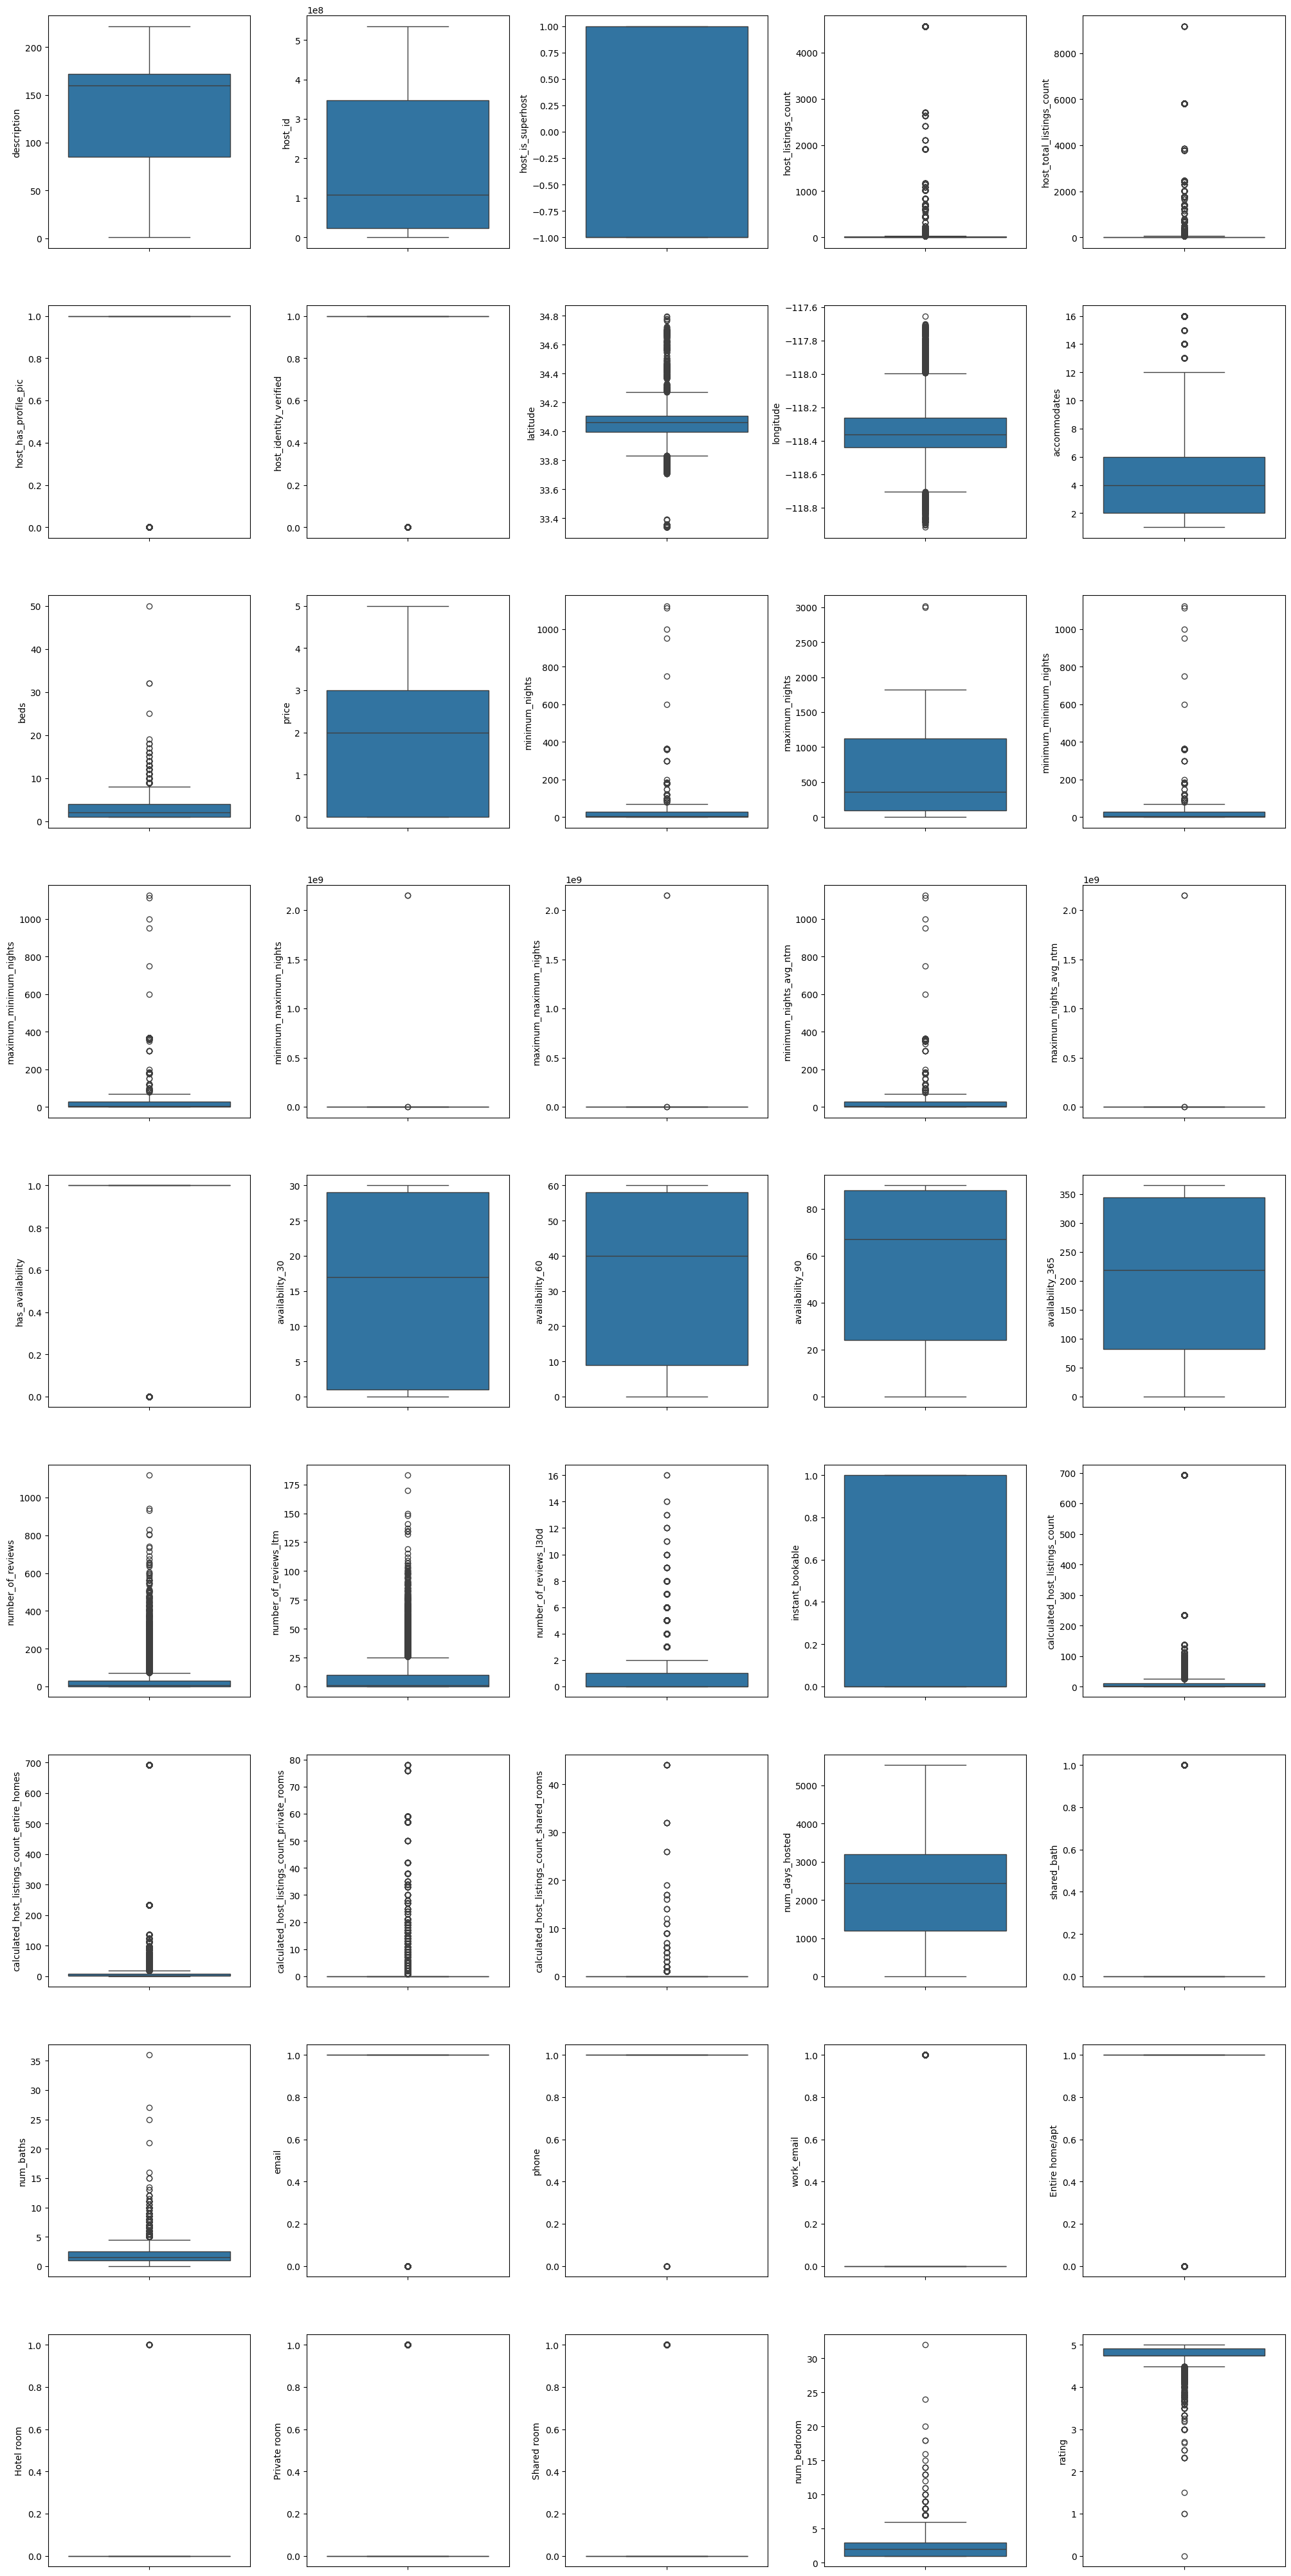

In [4]:
fig, axs = plt.subplots(ncols=5, nrows=9, figsize=(20, 40))
index = 0
axs = axs.flatten()  
for k,v in train_data.items():
    sns.boxplot(y=k, data=train_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [5]:
fig, axs = plt.subplots(ncols=5, nrows=9, figsize=(20, 40))
index = 0
axs = axs.flatten()
for k,v in train_data.items():
    sns.histplot(v, ax=axs[index], kde=True, stat="density", linewidth=0)
    index += 1
    print(index)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


: 

In [ ]:
plt.figure(figsize=(30, 20))
sns.heatmap(train_data.corr().abs(),  annot=True)

In [ ]:
for k, v in train_data.items():
    # Identify the 1st quartile
    q1 = v.quantile(0.25)
    # Identify the 3rd quartile
    q3 = v.quantile(0.75)
    # Get your interquartile range
    iqr = q3 - q1
    # Lower fence is q1 - (1.5 * iqr)
    # Upper fence is q3 + (1.5 * iqr)
    # Store outliers if they are above these fences
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    # Calculate the percentage of total outliers
    perc = np.shape(v_col)[0] * 100.0 / np.shape(train_data)[0]
    print("%s Outliers = %.2f%%" % (k, perc))